# Imports, Load data

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

pd.options.display.max_columns = 100
pd.options.display.max_rows = 100

sns.set_theme(context='talk', style='darkgrid', palette='magma')

In [2]:
# load the cleaned data
df = pd.read_csv('../train_data/non_seq.csv').set_index('player')
df.shape

(754, 64)

# Feature Analysis

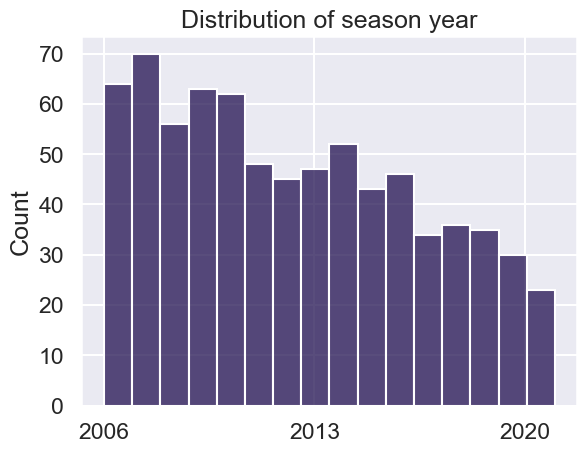

In [3]:
plt.title('Distribution of season year')
sns.histplot(df, x='year', bins=16)

plt.xlabel('')

plt.xticks(ticks=[2006, 2013, 2020]);

In [15]:
# corr matrix
corr = df.corr().drop(['player_game_count'], axis=0)#.drop(['target'], axis=1)

# only look at corrs with abs value greater than 0.2, fill rest of cells with NaN
filtered_corr = corr.where(corr.abs() > 0.2, np.nan)

# drop columns and rows with ALL null values
filtered_corr = filtered_corr.dropna(axis=1, how='all')
filtered_corr = filtered_corr.dropna(axis=0, how='all')

filtered_corr

,player_game_count,pass_accuracy_percent,pass_aimed_passes,pass_attempts,pass_avg_depth_of_target,pass_avg_time_to_throw,pass_bats,pass_big_time_throws,pass_btt_rate,pass_completion_percent,pass_completions,pass_def_gen_pressures,pass_drop_rate,pass_dropbacks,pass_drops,pass_first_downs,pass_grades_hands_fumble,pass_grades_offense,pass_grades_pass,pass_hit_as_threw,pass_interceptions,pass_passing_snaps,pass_penalties,pass_pressure_to_sack_rate,pass_qb_rating,pass_sack_percent,pass_sacks,pass_scrambles,pass_spikes,pass_thrown_aways,pass_touchdowns,pass_turnover_worthy_plays,pass_twp_rate,pass_yards,pass_ypa,year,rush_attempts,rush_avoided_tackles,rush_breakaway_attempts,rush_breakaway_percent,rush_breakaway_yards,rush_designed_yards,rush_elu_recv_mtf,rush_elu_rush_mtf,rush_elu_yco,rush_elusive_rating,rush_explosive,rush_first_downs,rush_fumbles,rush_gap_attempts,rush_grades_offense_penalty,rush_grades_run,rush_longest,rush_run_plays,rush_scramble_yards,rush_total_touches,rush_touchdowns,rush_yards,rush_yards_after_contact,rush_yco_attempt,rush_ypa,rush_zone_attempts,exp,target
pass_accuracy_percent,0.212436,1.000000,0.222111,0.222885,-0.404307,NaN,NaN,NaN,NaN,0.848343,0.243146,0.210773,NaN,0.221933,0.207098,0.236323,NaN,0.393963,0.395803,NaN,NaN,0.222104,NaN,NaN,0.572252,NaN,NaN,NaN,NaN,0.200765,0.226735,NaN,-0.276568,0.236105,0.536122,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.208949,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
pass_aimed_passes,0.967094,0.222111,1.000000,0.999507,NaN,NaN,0.803844,0.907469,0.347472,0.248275,0.995478,0.954370,NaN,0.997031,0.931269,0.989604,NaN,0.609244,0.602626,0.702407,0.866744,0.996825,0.688661,NaN,0.377561,NaN,0.844905,0.547993,0.542441,0.796104,0.930595,0.867203,NaN,0.990281,0.270787,NaN,0.565310,0.270164,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.387572,0.502502,0.732480,NaN,NaN,NaN,0.437013,0.945690,0.486198,0.560520,0.361767,0.391610,0.351119,NaN,NaN,NaN,0.342980,0.491461
pass_attempts,0.968747,0.222885,0.999507,1.000000,NaN,NaN,0.811935,0.904721,0.346294,0.245909,0.994936,0.958910,NaN,0.998121,0.931033,0.988853,NaN,0.606234,0.599352,0.713380,0.867082,0.997916,0.692703,NaN,0.375078,NaN,0.850049,0.554698,0.547313,0.810165,0.927272,0.868696,NaN,0.989524,0.269172,NaN,0.567834,0.274297,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.392901,0.508012,0.737078,NaN,NaN,NaN,0.441450,0.947393,0.492159,0.562965,0.364684,0.397168,0.356921,NaN,NaN,NaN,0.337592,0.489909
pass_avg_depth_of_target,NaN,-0.404307,NaN,NaN,1.000000,NaN,NaN,NaN,0.232776,-0.380673,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
pass_avg_time_to_throw,NaN,NaN,NaN,NaN,NaN,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.379035,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
pass_bats,0.801038,NaN,0.803844,0.811935,NaN,NaN,1.000000,0.682586,0.253312,NaN,0.792399,0.802310,NaN,0.816950,0.791090,0.784251,NaN,0.410911,0.403239,0.647394,0.738295,0.815162,0.561071,NaN,0.242683,NaN,0.730852,0.535693,0.434742,0.621303,0.693502,0.740554,NaN,0.782831,NaN,NaN,0.466542,0.251454,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.394992,0.462941,0.650483,NaN,NaN,NaN,0.395088,0.776424,0.487628,0.462658,0.281274,0.388099,0.351649,NaN,NaN,NaN,0.204669,0.335752
pass_big_time_throws,0.872843,NaN,0.907469,0.904721,NaN,NaN,0.682586,1.000000,0.496229,0.221846,0.903049,0.853204,NaN,0.899107,0.840203,0.919802,NaN,0.658896,0.660553,0.612786,0.771195,0.899348,0.620734,NaN,0.388852,NaN,0.726775,0.475344,0.484168,0.702460,0.911926,0.773305,NaN,0.925380,0.297255,NaN,0.541213,0.230147,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.350971,0.455295,0.641013,NaN,NaN,NaN,0.389434,0.863278,0.428392,0.535927,0.369567,0.349308,0.306296,NaN,NaN,NaN,0.325857,0.491011
pass_btt_rate,0.354289,

In [16]:
filtered_corr.loc[['target']]

,player_game_count,pass_accuracy_percent,pass_aimed_passes,pass_attempts,pass_avg_depth_of_target,pass_avg_time_to_throw,pass_bats,pass_big_time_throws,pass_btt_rate,pass_completion_percent,pass_completions,pass_def_gen_pressures,pass_drop_rate,pass_dropbacks,pass_drops,pass_first_downs,pass_grades_hands_fumble,pass_grades_offense,pass_grades_pass,pass_hit_as_threw,pass_interceptions,pass_passing_snaps,pass_penalties,pass_pressure_to_sack_rate,pass_qb_rating,pass_sack_percent,pass_sacks,pass_scrambles,pass_spikes,pass_thrown_aways,pass_touchdowns,pass_turnover_worthy_plays,pass_twp_rate,pass_yards,pass_ypa,year,rush_attempts,rush_avoided_tackles,rush_breakaway_attempts,rush_breakaway_percent,rush_breakaway_yards,rush_designed_yards,rush_elu_recv_mtf,rush_elu_rush_mtf,rush_elu_yco,rush_elusive_rating,rush_explosive,rush_first_downs,rush_fumbles,rush_gap_attempts,rush_grades_offense_penalty,rush_grades_run,rush_longest,rush_run_plays,rush_scramble_yards,rush_total_touches,rush_touchdowns,rush_yards,rush_yards_after_contact,rush_yco_attempt,rush_ypa,rush_zone_attempts,exp,target
target,0.4654,NaN,0.491461,0.489909,NaN,NaN,0.335752,0.491011,NaN,NaN,0.507504,0.444345,NaN,0.480385,0.455609,0.513337,NaN,0.480413,0.481802,0.334114,0.353758,0.480736,0.348575,NaN,0.281978,NaN,0.348077,NaN,0.266388,0.396184,0.524902,0.313188,NaN,0.517119,0.211657,NaN,0.297819,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.200301,0.298916,NaN,NaN,NaN,NaN,0.470342,NaN,0.298177,NaN,NaN,NaN,NaN,NaN,NaN,0.28702,1.0


In [22]:
# look at corrs for passing, offense, and rushing grade
grade_corrs = corr[['pass_grades_pass', 'pass_grades_offense', 'rush_grades_run', 'target']].T
grade_corrs = grade_corrs.where(grade_corrs.abs() > 0, np.nan)
grade_corrs = grade_corrs.dropna(axis=1, how='all')
grade_corrs

,pass_accuracy_percent,pass_aimed_passes,pass_attempts,pass_avg_depth_of_target,pass_avg_time_to_throw,pass_bats,pass_big_time_throws,pass_btt_rate,pass_completion_percent,pass_completions,pass_def_gen_pressures,pass_drop_rate,pass_dropbacks,pass_drops,pass_first_downs,pass_grades_hands_fumble,pass_grades_offense,pass_grades_pass,pass_hit_as_threw,pass_interceptions,pass_passing_snaps,pass_penalties,pass_pressure_to_sack_rate,pass_qb_rating,pass_sack_percent,pass_sacks,pass_scrambles,pass_spikes,pass_thrown_aways,pass_touchdowns,pass_turnover_worthy_plays,pass_twp_rate,pass_yards,pass_ypa,year,rush_attempts,rush_avoided_tackles,rush_breakaway_attempts,rush_breakaway_percent,rush_breakaway_yards,rush_designed_yards,rush_elu_recv_mtf,rush_elu_rush_mtf,rush_elu_yco,rush_elusive_rating,rush_explosive,rush_first_downs,rush_fumbles,rush_gap_attempts,rush_grades_offense_penalty,rush_grades_run,rush_longest,rush_run_plays,rush_scramble_yards,rush_total_touches,rush_touchdowns,rush_yards,rush_yards_after_contact,rush_yco_attempt,rush_ypa,rush_zone_attempts,exp,target
pass_grades_pass,0.395803,0.602626,0.599352,0.062558,-0.060362,0.403239,0.660553,0.457459,0.393392,0.630085,0.542186,-0.064450,0.588232,0.545342,0.648481,0.251905,0.966769,1.000000,0.388183,0.373252,0.588184,0.407797,-0.198607,0.646750,-0.222710,0.411999,0.246583,0.314693,0.467029,0.679584,0.335762,-0.397260,0.650622,0.461256,0.000065,0.370463,0.114271,0.076856,0.029326,0.080271,0.052093,0.023222,0.045553,0.090357,-0.151196,0.170972,0.255434,0.327931,0.055274,0.050703,0.034302,0.219269,0.583058,0.211194,0.371050,0.218190,0.171740,0.146442,-0.037764,-0.017260,0.055112,0.380425,0.481802
pass_grades_offense,0.393963,0.609244,0.606234,0.063514,-0.026294,0.410911,0.658896,0.440091,0.389667,0.636206,0.554914,-0.044803,0.596900,0.549453,0.654855,0.306557,1.000000,0.966769,0.388804,0.379808,0.597204,0.395118,-0.189429,0.634633,-0.212603,0.425136,0.278561,0.319995,0.478935,0.681775,0.349266,-0.360228,0.654554,0.463940,0.060612,0.380862,0.172347,0.112008,0.056449,0.111756,0.089368,0.024795,0.101560,0.132022,-0.103260,0.219993,0.299734,0.312967,0.076950,0.074931,0.135385,0.264037,0.585848,0.251866,0.382585,0.253285,0.217091,0.195210,0.011059,0.056932,0.096958,0.375123,0.480413
rush_grades_run,0.082683,0.084452,0.087080,-0.042718,0.170377,0.065610,0.052530,0.064479,0.040452,0.086771,0.131465,0.090562,0.101427,0.069049,0.091158,0.089762,0.135385,0.034302,0.060116,0.035952,0.103467,0.059919,-0.022141,0.076546,-0.028993,0.127256,0.283867,0.056444,0.132919,0.074267,0.090862,0.033409,0.079502,0.039957,0.303227,0.191939,0.323406,0.212382,0.116893,0.195668,0.228185,0.024938,0.238666,0.227074,0.201079,0.340103,0.322076,0.041084,0.140000,0.395582,1.000000,0.357568,0.093273,0.316390,0.195909,0.253393,0.324812,0.317785,0.357750,0.435136,0.215567,-0.021131,0.030814
target,0.198465,0.491461,0.489909,0.023744,-0.013001,0.335752,0.491011,0.161071,0.179490,0.507504,0.444345,0.014096,0.480385,0.455609,0.513337,0.122747,0.480413,0.481802,0.334114,0.353758,0.480736,0.348575,-0.171023,0.281978,-0.163777,0.348077,0.177010,0.266388,0.396184,0.524902,0.313188,-0.124290,0.517119,0.211657,-0.028249,0.297819,0.102035,0.086809,0.058656,0.082311,0.041513,-0.039619,0.063307,0.064819,-0.091130,0.114212,0.200301,0.298916,0.042012,0.054014,0.030814,0.156330,0.470342,0.146661,0.298177,0.165485,0.121692,0.104979,-0.032205,-0.055391,0.087062,0.287020,1.000000


In [23]:
grade_corrs.shape

(4, 63)